# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [6]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

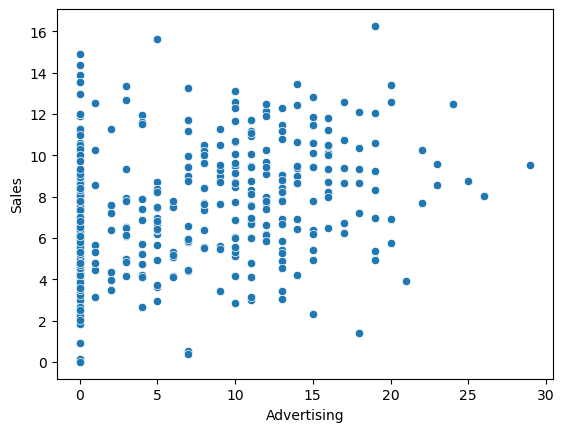

In [13]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

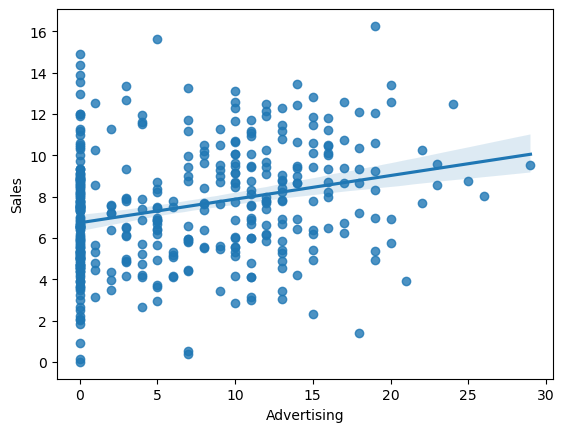

In [15]:
sns.regplot(x=var, y = target, data = data)
plt.show()

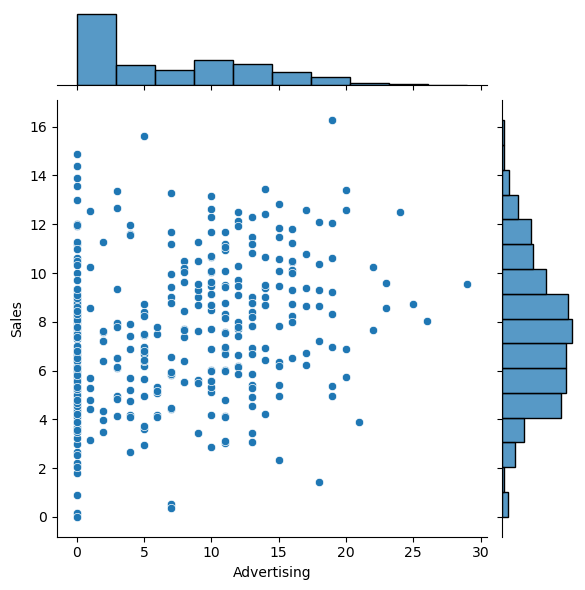

In [22]:
# 서브 플롯 안에 안 들어간다.
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [19]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

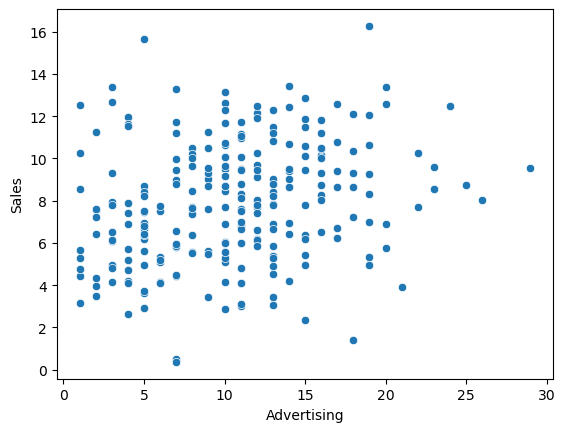

In [24]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [26]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

In [62]:
def visualization(var, target, data):
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var, y=target, data=data)

    plt.subplot(1, 2, 2)
    sns.regplot(x=var, y=target, data=data)

    plt.tight_layout()
    plt.show()

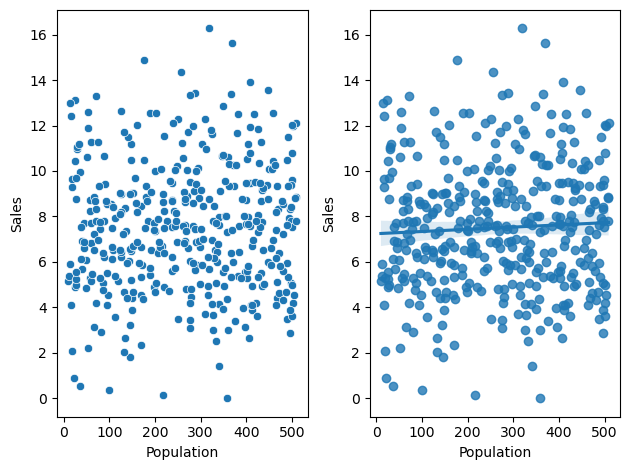

In [64]:
visualization(var, target, data)

<Figure size 500x300 with 0 Axes>

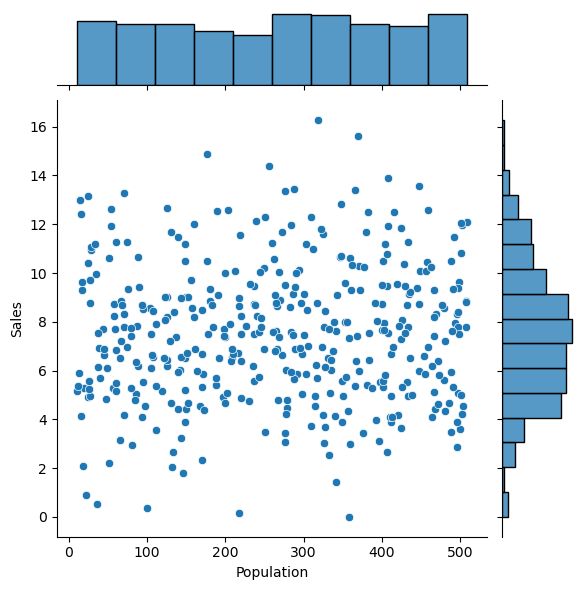

In [77]:
# 서브 플롯 안에 안 들어간다.
def joint(var, target, data):
    plt.figure(figsize=(5, 3))
    sns.jointplot(x=var, y=target, data=data)
    plt.show()

joint('Population', 'Sales', data)

2) 수치화 : 상관분석

In [58]:
def pearson(var, target, data):
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수: {result[0]}, p-value: {result[1]}')

In [71]:
pearson('Population', 'Sales', data)

상관계수: 0.0504709844720392, p-value: 0.31398160931904856


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 인구 수와 판매량은 관계가 거의 없다.

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

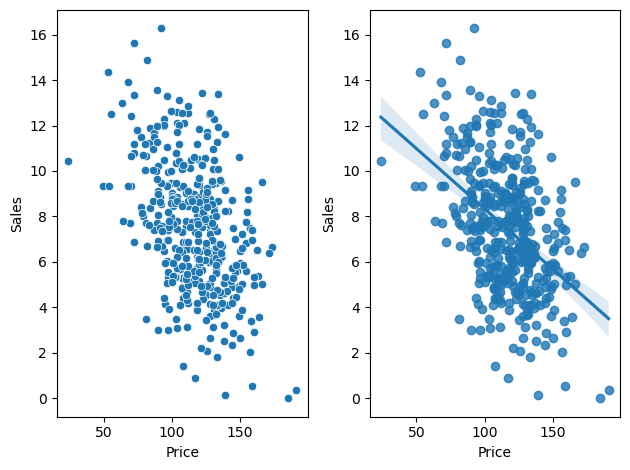

In [75]:
visualization('Price', 'Sales', data)

<Figure size 500x300 with 0 Axes>

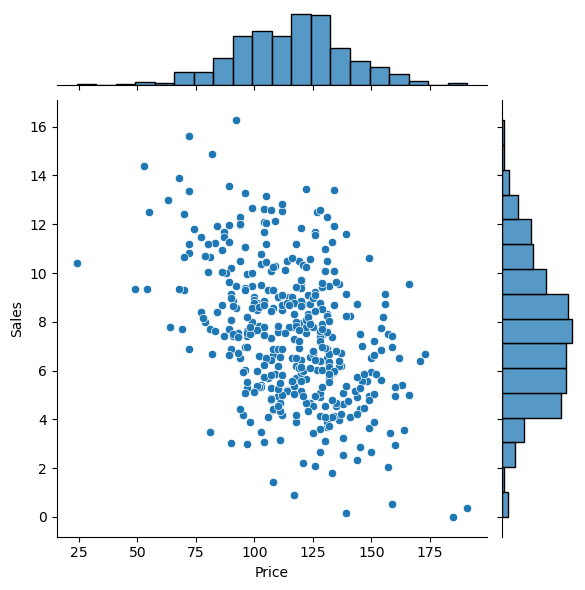

In [79]:
joint('Price', 'Sales', data)

2) 수치화 : 상관분석

In [84]:
pearson('Price', 'Sales', data)

상관계수: -0.4449507278465726, p-value: 7.618187011913169e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 가격이 높으면 판매량은 감소한다.
* 가격과 판매량은 음의 상관관계를 가진다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

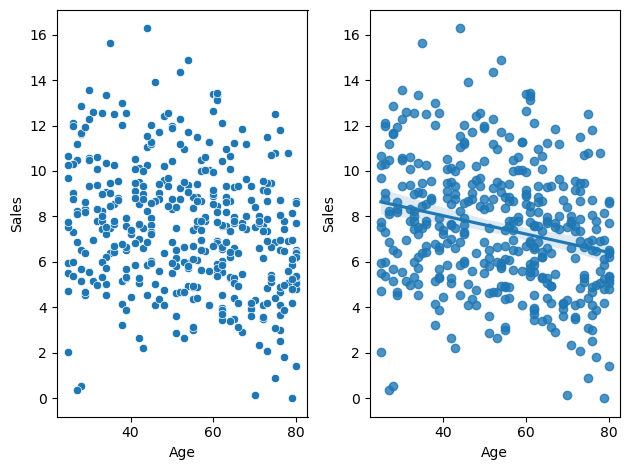

In [86]:
visualization('Age', 'Sales', data)

<Figure size 500x300 with 0 Axes>

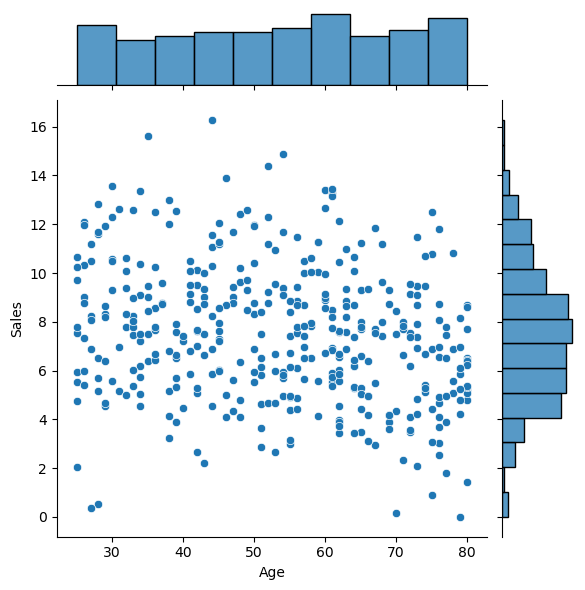

In [88]:
joint('Age', 'Sales', data)

2) 수치화 : 상관분석

In [90]:
pearson('Age', 'Sales', data)

상관계수: -0.2318154396045765, p-value: 2.7889498393714038e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 나이가 올라갈수록 판매량이 줄어드는 음의 상관관계가 보이지만 크지는 않다.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

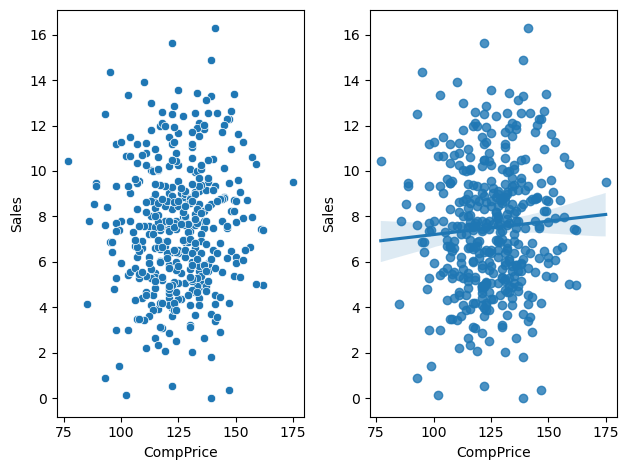

In [92]:
visualization('CompPrice', 'Sales', data)

<Figure size 500x300 with 0 Axes>

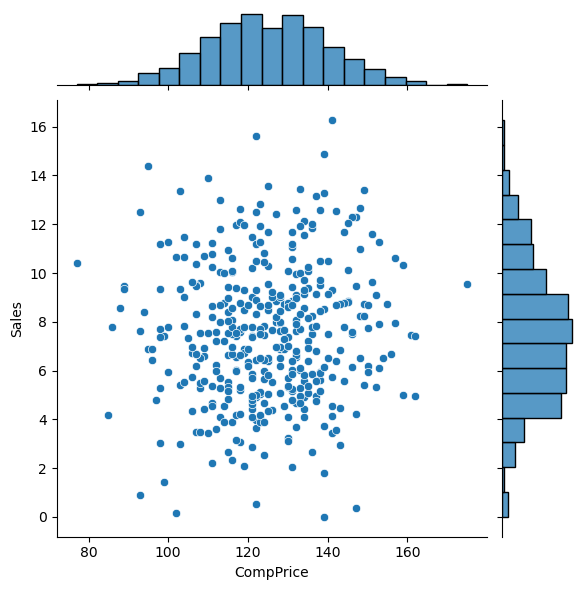

In [94]:
joint('CompPrice', 'Sales', data)

2) 수치화 : 상관분석

In [96]:
pearson('CompPrice', 'Sales', data)

상관계수: 0.06407872955062152, p-value: 0.2009398289418404


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* p값이 0.5보다 크므로 값은 유의하지 않다.
* 상관관계가 없다.

4. 추가 분석

In [113]:
# 가격차이 = 가격경쟁력
data['price_diff'] = data['CompPrice'] - data['Price']
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,price_diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


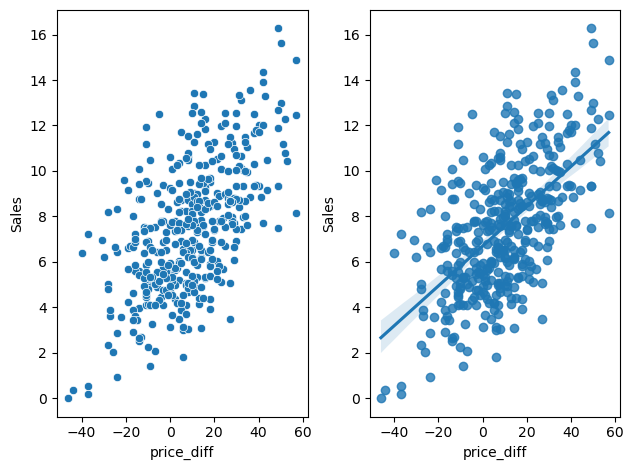

In [115]:
visualization('price_diff', 'Sales', data)

In [119]:
pearson('price_diff', 'Sales', data)

상관계수: 0.5979217124533921, p-value: 3.877120641788767e-40


* 고객 입장에서 비즈니스 관점으로 데이터를 뽑아내는 것이 중요하다.
* 가격 차이가 클수록 판매량은 증가하는 중간 정도의 상관관계를 가진다.
* 경쟁사 판매가격을 그대로 비교했을 때보다 훨씬 큰 상관관계이다.

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

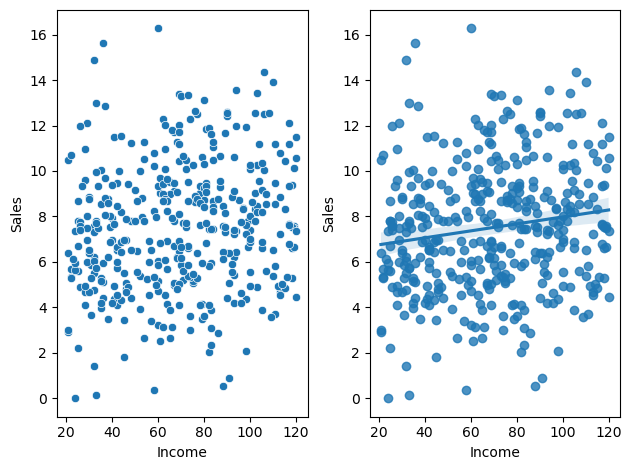

In [101]:
visualization('Income', 'Sales', data)

<Figure size 500x300 with 0 Axes>

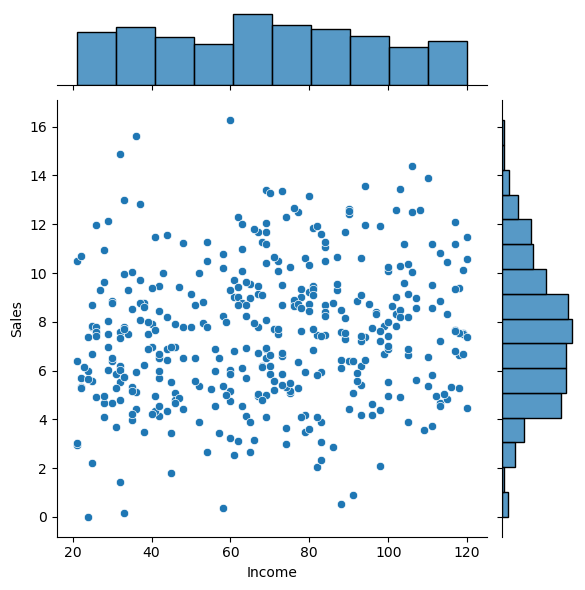

In [102]:
joint('Income', 'Sales', data)

2) 수치화 : 상관분석

In [103]:
pearson('Income', 'Sales', data)

상관계수: 0.15195097946754424, p-value: 0.0023096704539517904


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 수입이 높을수록 판매량이 증가하는 경향이 있지만 상관관계가 크지는 않다.

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

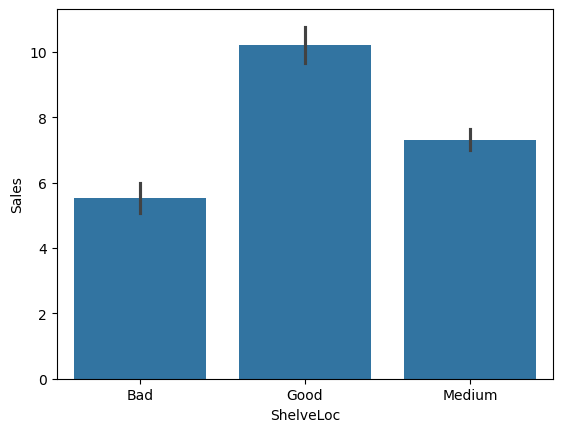

In [127]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [129]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 진열 상태가 좋을수록 판매량이 높다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

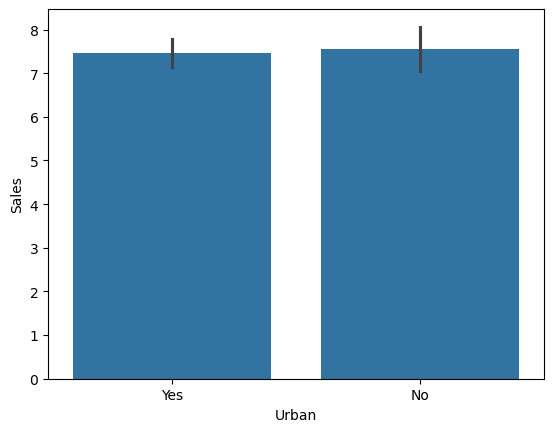

In [131]:
var = 'Urban'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [134]:
u = data.loc[data['Urban'] == 'Yes', 'Sales']
r = data.loc[data['Urban'] == 'No', 'Sales']

In [137]:
spst.ttest_ind(u, r)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 매장이 도시에 위치한다고 해서 판매량이 높은 것은 아니다.

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

<Axes: xlabel='US', ylabel='Sales'>

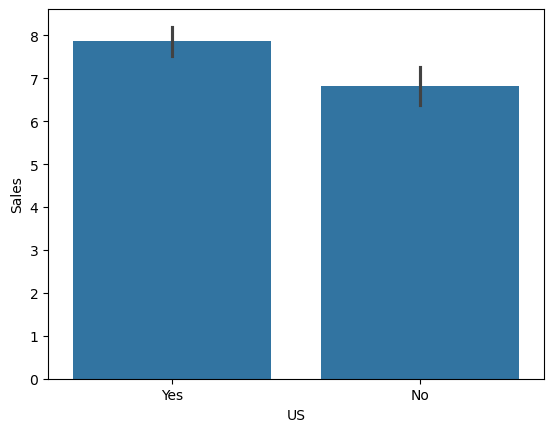

In [141]:
sns.barplot(x='US', y='Sales', data=data)

2) 수치화 : t-test, anova

In [143]:
U_y = data.loc[data['US'] == 'Yes', 'Sales']
U_n = data.loc[data['US'] == 'No', 'Sales']

spst.ttest_ind(U_y, U_n)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 미국에 있는 매장이 판매량이 조금 더 높다.

## **4.관계 정리하기**

### ① 강한관계

#### <수치형>
* Price_Diff

#### <범주형>
* ShelveLoc

### ② 중간관계

#### <수치형>
* Advertising, Price, Age, Income

#### <범주형>
* US

### ③ 관계없음

#### <수치형>
* Population

#### <범주형>
* Urban